Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


Read the Dataset and get an overview

In [2]:

job_data = pd.read_csv('../Assets/DataAnalyst.csv')
job_data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


We can see that there is an Unnamed column which looks like serial number, lets get more on the numerical columns

In [3]:
job_data.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [4]:
job_data.shape

(2253, 16)

##### Data Cleaning #####
It is clear that "Unnamed: 0" gives zero information , it is just a serial number. We can drop this column.
Competitors and Easy Apply columns doesn't provide that much info for our analyisis and most of the values are missing.

In [5]:
job_data.drop(columns = ['Unnamed: 0', 'Competitors', 'Easy Apply'], inplace = True)

In [6]:
job_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD)


##### Data Prepration #####
Most of the columns have values given in string we can parse it and create new columns with integer values.
We will convert these Ordinal variables to Nominal variables

In [7]:
job_data['Salary Estimate'].value_counts()



$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

The salary is given in a range. And "(Glassdoor est.)" is appended to each value. Clearly we are working on Glassdoor dataset so we can remove this string from salary. And We can take average salary of the range given.

In [8]:
trim_salary = lambda x: x.rstrip('K (Glassdoor est.)').replace('$','').replace('K','')

modified_salary = job_data['Salary Estimate'].apply(trim_salary)
modified_salary.replace('-1',"0-0", inplace = True)
modified_salary.value_counts()

41-78    57
42-76    57
50-86    41
35-67    33
58-93    31
         ..
47-81     3
43-77     3
36-67     3
57-70     2
0-0       1
Name: Salary Estimate, Length: 90, dtype: int64

In [9]:
get_min = lambda x: int(x.split('-')[0])
min_salary = modified_salary.apply(get_min)
min_salary.replace(0, None, inplace=True)
min_salary.fillna(min_salary.mean(), inplace=True)

In [10]:
get_max = lambda x: int(x.split('-')[1])
max_salary = modified_salary.apply(get_max)
max_salary.replace(0, None, inplace=True)
max_salary.fillna( max_salary.mean(), inplace=True)

In [11]:
job_data['Company Name'].head()

0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: Company Name, dtype: object

In [12]:
job_data['min_salary'] = min_salary
job_data['max_salary'] = max_salary
job_data.drop(columns = 'Salary Estimate', inplace = True)


In [13]:
Location = job_data['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
job_data['Location City'] = Location_City
job_data['Location State'] = Location_State
job_data.drop('Location',axis = 1, inplace = True)

HQ = job_data['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
job_data['Headquarters City'] = Headquarters_City
job_data['Headquarters State'] = Headquarters_State
job_data.drop('Headquarters',axis = 1, inplace = True)

Most of the jobs are from companies having ratings from 3 to 4. The average salary the jobs are giving is between 60K USD to 100K USD. The major sectors that are having high data analyst job demands are Health care, Information technology,Business services and Education. Highest paying sectors are IT and business services.

In [14]:
job_data.head()

,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,Location City,Location State,Headquarters City,Headquarters State
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37,66,New York,NY,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37,66,New York,NY,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37,66,New York,NY,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37,66,New York,NY,McLean,VA
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37,66,New York,NY,New York,NY


In [15]:
job_data['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [16]:
revenue_dict = {'$100 to $500 million (USD)': 250,
               '$50 to $100 million (USD)': 75,
               '$10+ billion (USD)': 50,
               '$10 to $25 million (USD)': 18,
               '$2 to $5 billion (USD)': 3.5,
               '$1 to $5 million (USD)': 3,
                '$1 to $2 billion (USD)': 1.5,
               '$25 to $50 million (USD)': 38,
               'Less than $1 million (USD)': 0.5,
               '$500 million to $1 billion (USD)': 750,
               '$5 to $10 million (USD)': 7.5,
               '$5 to $10 billion (USD)': 7500,
                'Unknown / Non-Applicable': None,
                '-1': None
               }

revenue_cleared_data = job_data.replace({'Revenue': revenue_dict})
revenue_cleared_data['Revenue'].fillna(revenue_cleared_data['Revenue'].mean(), inplace = True)
revenue_cleared_data.head()

,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,Location City,Location State,Headquarters City,Headquarters State
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,250.000000,37,66,New York,NY,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.500000,37,66,New York,NY,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,383.852542,37,66,New York,NY,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,75.000000,37,66,New York,NY,McLean,VA
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",250.000000,37,66,New York,NY,New York,NY


In [17]:
revenue_cleared_data.corr()

,Rating,Founded,Revenue,min_salary,max_salary
Rating,1.000000,0.500465,-0.019810,-0.007822,0.012279
Founded,0.500465,1.000000,0.070940,-0.005442,0.001219
Revenue,-0.019810,0.070940,1.000000,0.006351,0.018688
min_salary,-0.007822,-0.005442,0.006351,1.000000,0.858526
max_salary,0.012279,0.001219,0.018688,0.858526,1.000000


In [18]:
revenue_cleared_data['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [19]:
size_dict = {
    '51 to 200 employees': 125,
    '10000+ employees': 25000,
    '1001 to 5000 employees': 3000,
    '1 to 50 employees': 25,
    '201 to 500 employees': 350,
    '501 to 1000 employees': 750,
    '5001 to 10000 employees': 7500,
    'Unknown': None,
    '-1': None
}
size_trimed_data = revenue_cleared_data.replace({'Size': size_dict})

size_trimed_data['Size'].fillna(size_trimed_data['Size'].mean(), inplace =True)

size_trimed_data.head()


,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,Location City,Location State,Headquarters City,Headquarters State
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,350.0,1961,Nonprofit Organization,Social Assistance,Non-Profit,250.000000,37,66,New York,NY,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,25000.0,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.500000,37,66,New York,NY,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,3000.0,2003,Company - Private,Internet,Information Technology,383.852542,37,66,New York,NY,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,350.0,2002,Subsidiary or Business Segment,IT Services,Information Technology,75.000000,37,66,New York,NY,McLean,VA
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,750.0,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",250.000000,37,66,New York,NY,New York,NY


#### Visualization ####

In [20]:
job_state_counts = size_trimed_data['Location State'].value_counts()
job_state_counts_head = job_state_counts
job_city_counts = size_trimed_data['Location City'].value_counts()
job_city_counts_head = job_city_counts.head(10)

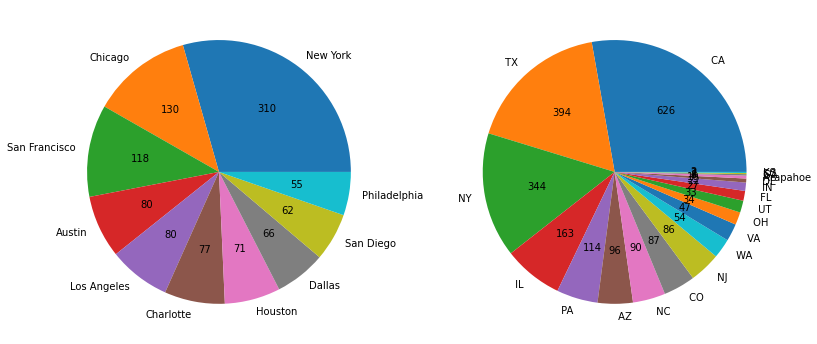

In [21]:
state_sum = job_state_counts_head.sum()
city_sum = job_city_counts_head.sum()
def state_count(val):
    return int(val * state_sum /100)
def city_count(val):
    return int(val * city_sum /100)
plt.figure(figsize = [13,8])
plt.subplot(1,2,2)
plt.pie(job_state_counts_head, labels = job_state_counts_head.index.values, autopct = state_count)
plt.subplot(1,2,1)
plt.pie(job_city_counts_head, labels = job_city_counts_head.index.values, autopct = city_count)
plt.show()

##### From above plot we can see the major cities with high demand of Data analyst jobs are :- #####
1. New York
2. Chicago
3. San Francisco
4. Austin
5. Los Angeles
6. Charlotte
7. Houston
8. Dallas
9. San Diego
10. Philadelphia

Alongside we can see that CA and TX are state with high demand of data analyst jobs.

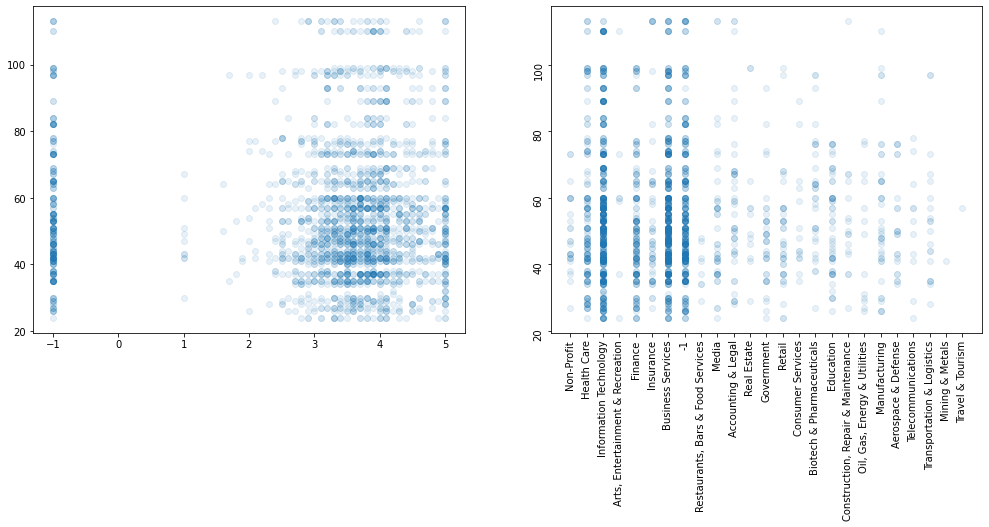

In [22]:
plt.figure(figsize = [17,6])
plt.subplot(1,2,1)
#plt.scatter(data = size_trimed_data , x = 'Rating', y = 'max_salary', alpha = 1/10)
plt.scatter(data = size_trimed_data , x = 'Rating', y = 'min_salary', alpha = 1/10)
plt.subplot(1,2,2)
plt.tick_params(rotation = 90)
#plt.scatter(data = size_trimed_data , x = 'Sector', y = 'max_salary', alpha = 1/10)
plt.scatter(data = size_trimed_data , x = 'Sector', y = 'min_salary', alpha = 1/10)

In [23]:
major_companies = size_trimed_data['Company Name'].value_counts().index.values[:20]
major_companies

array(['Staffigo Technical Services, LLC\n5.0', 'Diverse Lynx\n3.9',
       'Lorven Technologies Inc\n4.0', 'Kforce\n4.1', 'Robert Half\n3.5',
       'Avacend, Inc.\n2.5', 'Mondo\n3.9', 'Apex Systems\n3.8',
       'Apple\n4.1', 'eTeam Inc.\n3.7',
       'Reliable Software Resources\n4.0',
       'APN Software Services Inc.\n4.1', 'TechUSA\n2.7',
       'The Bank of New York Mellon\n3.2', 'Capgemini\n3.8', 'MUFG\n3.1',
       'Citi\n3.7', 'Collabera\n4.1', 'Infotree Service Inc\n3.7',
       'Perficient\n3.6'], dtype=object)

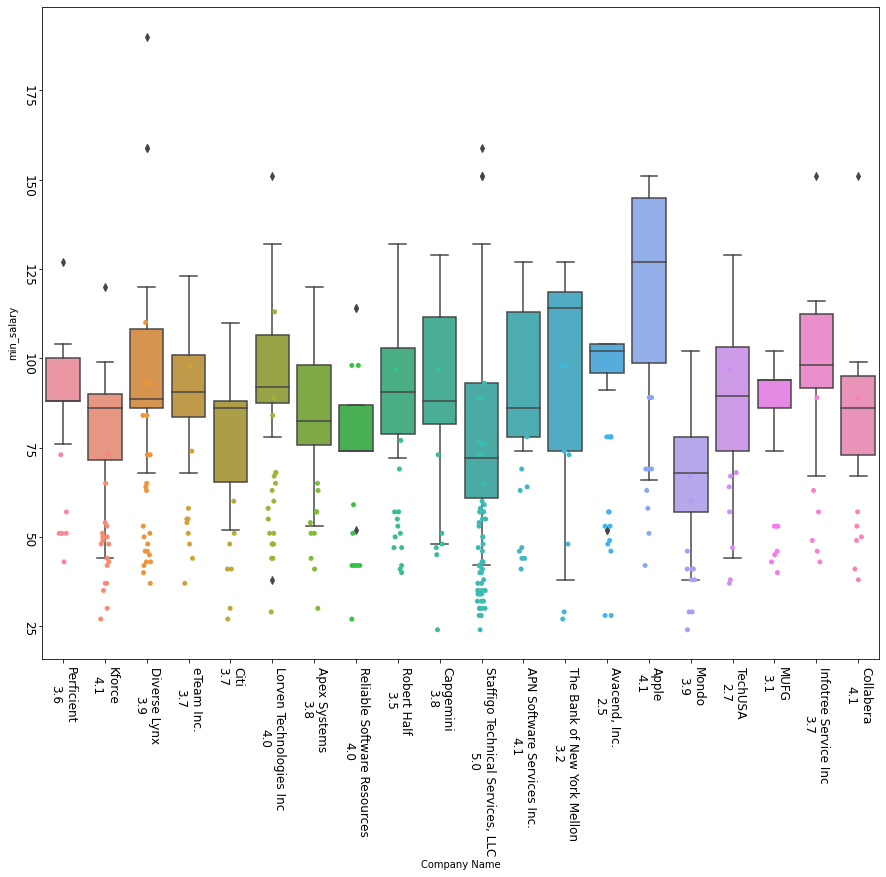

In [24]:
top_comapnies_data = size_trimed_data[size_trimed_data['Company Name'].isin(major_companies)]
plt.figure(figsize = [15,12])
plt.tick_params(labelsize=12, labelrotation = 270)
sb.boxplot(data = top_comapnies_data, x = 'Company Name', y = 'max_salary', orient = 1)
sb.stripplot(data = top_comapnies_data, x = 'Company Name', y = 'min_salary', orient = 1)



### Which are the highest paying companies in the sector?###

As we can see from the boxplot Apple stands the top most highest paying firm that pays on average 130K USD for data analyst job among the top 20 comapnies having openings. The Bank of New York Mellon is second in the line.Then TechUSA, Avacend Inc., Lorven technologies etc.These top companies are paying 90K USD on an average.Companies like Collabera , MUFG ,Apple Robert Half ensures good minimum salary. Even the minimum salary in these companies is good as compared to others.


<BarContainer object of 25 artists>

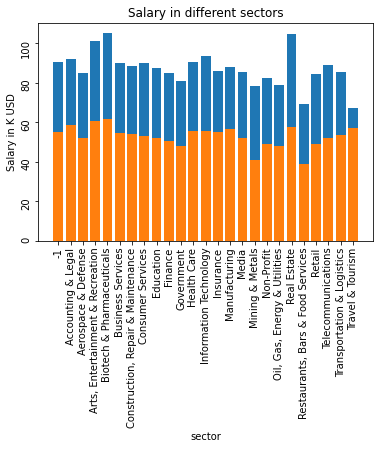

In [25]:

top_max_salary = size_trimed_data.groupby('Sector')['max_salary'].mean()
top_min_salary = size_trimed_data.groupby('Sector')['min_salary'].mean()
plt.title('Salary in different sectors')
plt.xlabel('sector')
plt.ylabel('Salary in K USD')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary.index.values, top_max_salary.values , width = 0.8)
plt.bar(top_min_salary.index.values, top_min_salary.values , width = 0.8)



([<matplotlib.patches.Wedge at 0xc2a98e0>,
 [Text(0.770462137582874, 0.7851038750071413, 'Information Technology'),
  Text(-0.7493938393931928, 0.8052383954330108, 'Business Services'),
  Text(-1.0124854166422936, -0.4299689303736736, '-1'),
  Text(-0.4698555905677132, -0.9946032998197148, 'Finance'),
  Text(0.005368431609151855, -1.099986899895657, 'Health Care'),
  Text(0.3123801141692878, -1.0547125979486465, 'Education'),
  Text(0.4601252035181865, -0.9991420304878319, 'Insurance'),
  Text(0.5867651585155649, -0.9304335810535883, 'Accounting & Legal'),
  Text(0.6926695601808562, -0.8545226037963298, 'Media'),
  Text(0.7856408754567976, -0.769914550331059, 'Manufacturing'),
  Text(0.8645722067966773, -0.6800844794837797, 'Retail'),
  Text(0.9300242706262845, -0.58741370093491, 'Government'),
  Text(0.9821531215407041, -0.49535365734780956, 'Biotech & Pharmaceuticals'),
  Text(1.019537943454147, -0.4129677733882982, 'Non-Profit'),
  Text(1.0448750055749136, -0.34385494430766017, 'Aer

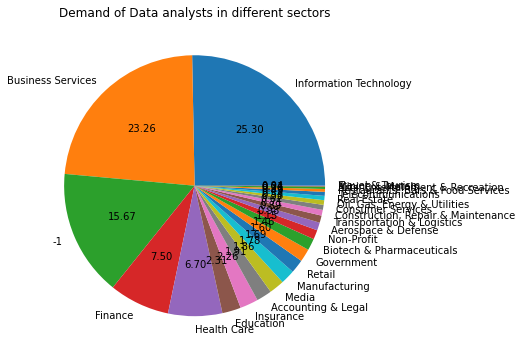

In [26]:
plt.figure(figsize = [10,6])
plt.title('Demand of Data analysts in different sectors')
sector_values = size_trimed_data['Sector'].value_counts()
sector_index = sector_values.index
plt.pie(sector_values, labels = sector_index, autopct = "%.2f" )

As we can see from the above graph the highest paying jobs aren't necessarily from good rating firm. The highest paying sectors are Real estate, Biotech & pharmaceuticals and Arts, Entertainment. These are the sectors that can make good fortune from Data analysis. The real estate companies can profit from data analysis by knowing which are the good buyers. When is the good time to buy/sell properties. Biotech and Pharamaceuticals use data analysis in recongnizing virus patterns, diagnosing disease and creating new medicines that can help. It is normal that medical usage data analysis for DNA matching. The data can be used to find new medicines which are effective. 
The Arts,Entertainment secotors are mostly media stream apps. These companies uses data analysis to recommend movies to people and gaining users from it. More they can use the audience interest to show them relevant ads. and they earn from it.

In [27]:
size_trimed_data.head()

,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,Location City,Location State,Headquarters City,Headquarters State
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,350.0,1961,Nonprofit Organization,Social Assistance,Non-Profit,250.000000,37,66,New York,NY,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,25000.0,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.500000,37,66,New York,NY,New York,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,3000.0,2003,Company - Private,Internet,Information Technology,383.852542,37,66,New York,NY,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,350.0,2002,Subsidiary or Business Segment,IT Services,Information Technology,75.000000,37,66,New York,NY,McLean,VA
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,750.0,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",250.000000,37,66,New York,NY,New York,NY


In [28]:
top_cities = size_trimed_data['Headquarters City'].value_counts()[:15]


In [29]:
top_cities_data = size_trimed_data[size_trimed_data['Headquarters City'].isin(top_cities.index)]


<BarContainer object of 15 artists>

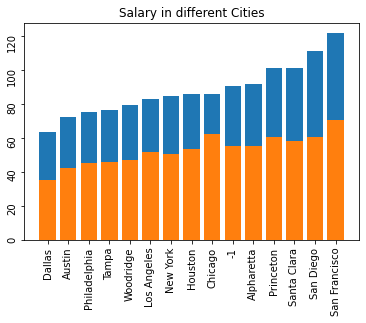

In [30]:
top_max_salary = top_cities_data.groupby('Headquarters City')['max_salary'].mean()

top_max_salary_sorted = top_max_salary.sort_values()
top_min_salary = top_cities_data.groupby('Headquarters City')['min_salary'].mean()
plt.title('Salary in different Cities')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary_sorted.index.values, top_max_salary_sorted.values, width = 0.8)
plt.bar(top_min_salary.index.values, top_min_salary.values, width = 0.8)


<BarContainer object of 15 artists>

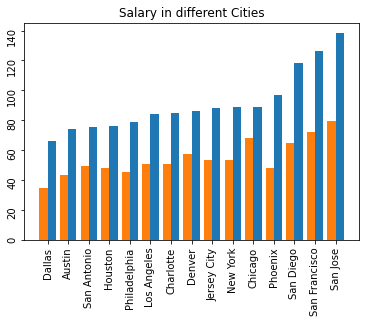

In [31]:
top_cities = size_trimed_data['Location City'].value_counts()[:15]
top_cities_data = size_trimed_data[size_trimed_data['Location City'].isin(top_cities.index)]
top_max_salary = top_cities_data.groupby('Location City')['max_salary'].mean()

top_max_salary_sorted = top_max_salary.sort_values()
top_min_salary = top_cities_data.groupby('Location City')['min_salary'].mean()
plt.title('Salary in different Cities')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary_sorted.index.values, top_max_salary_sorted.values,align = 'edge', width = 0.4)
plt.bar(top_min_salary.index.values, top_min_salary.values, align = 'edge',width = -0.4)


<BarContainer object of 15 artists>

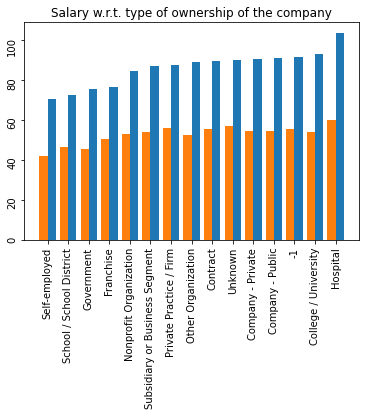

In [32]:
top_cities = size_trimed_data['Type of ownership'].value_counts()
top_cities_data = size_trimed_data[size_trimed_data['Type of ownership'].isin(top_cities.index)]
top_max_salary = top_cities_data.groupby('Type of ownership')['max_salary'].mean()

top_max_salary_sorted = top_max_salary.sort_values()
top_min_salary = top_cities_data.groupby('Type of ownership')['min_salary'].mean()
plt.title('Salary w.r.t. type of ownership of the company')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary_sorted.index.values, top_max_salary_sorted.values,align = 'edge', width = 0.4)
plt.bar(top_min_salary.index.values, top_min_salary.values, align = 'edge',width = -0.4)


<BarContainer object of 20 artists>

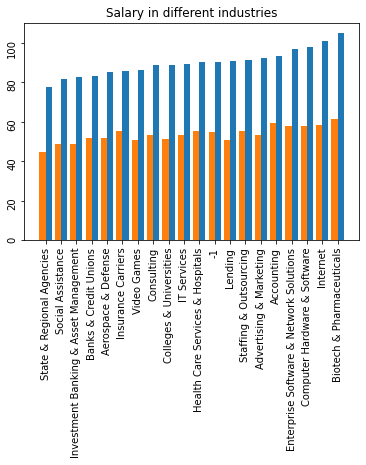

In [33]:
top_cities = size_trimed_data['Industry'].value_counts()[:20]
top_cities_data = size_trimed_data[size_trimed_data['Industry'].isin(top_cities.index)]
top_max_salary = top_cities_data.groupby('Industry')['max_salary'].mean()

top_max_salary_sorted = top_max_salary.sort_values()
top_min_salary = top_cities_data.groupby('Industry')['min_salary'].mean()
plt.title('Salary in different industries')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary_sorted.index.values, top_max_salary_sorted.values,align = 'edge', width = 0.4)
plt.bar(top_min_salary.index.values, top_min_salary.values, align = 'edge',width = -0.4)


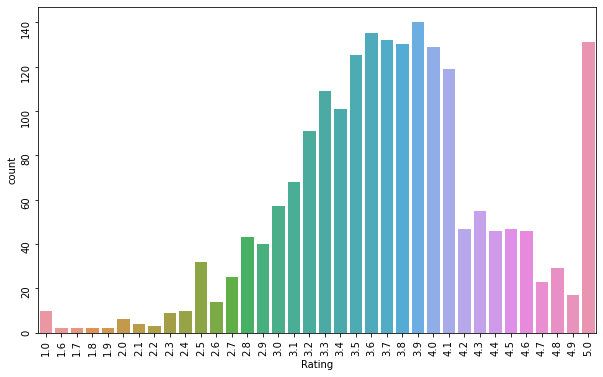

In [34]:
plt.figure(figsize = [10,6])
plt.tick_params(rotation = 90)
sb.countplot(data = size_trimed_data[size_trimed_data['Rating'] !=-1], x= 'Rating')

#### How is the job satisfaction in Data analyst jobs ####
If we compare the company ratings for data analyst jobs, most of the comapnies have ratings lying from 3.1 to 4.1
There are good no. of jobs in comapnies that have absolute rating of 5. A very few companies have ratings below 3 that are offering data analyst job.

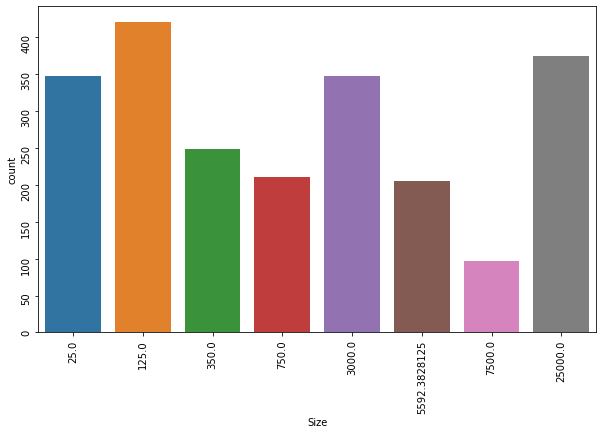

In [35]:
plt.figure(figsize = [10,6])
plt.tick_params(rotation = 90)
sb.countplot(data = size_trimed_data[size_trimed_data['Size'] !=-1], x= 'Size')

<BarContainer object of 36 artists>

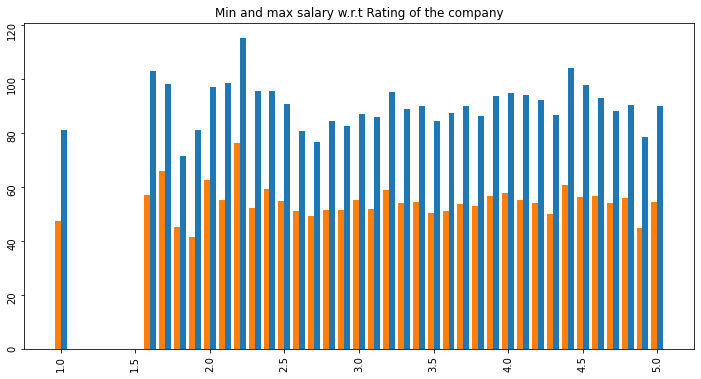

In [36]:

top_cities_data = size_trimed_data[size_trimed_data['Rating'] != -1]
top_max_salary = top_cities_data.groupby('Rating')['max_salary'].mean()

top_max_salary_sorted = top_max_salary.sort_values()
top_min_salary = top_cities_data.groupby('Rating')['min_salary'].mean()
plt.figure(figsize = [12,6])
plt.title('Min and max salary w.r.t Rating of the company')
plt.tick_params(rotation = 90)
plt.bar(top_max_salary_sorted.index.values, top_max_salary_sorted.values,align = 'edge', width = 0.04)
plt.bar(top_min_salary.index.values, top_min_salary.values, align = 'edge',width = -0.04)


From above plot we can see that ratings doesn't really pay much role in minimum and maximum salary calculation.Though data suggest the highest paying jobs have company rating below 2.5. All of the 3.0+ rating companies are offering the same.